#### Ejercicio 1: Clustering con Modelo K-Means sobre datos autogenerados (muestras de 2 dimensiones, 4 comportamientos distintos)

__1. Generamos las muestras de forma sintética para el ejercicio y vemos qué aspecto tienen__

In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create blobs
# Four blobs (four classes), 200 samples, 2 dimensions, all blobs with same std
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

print(f"Data (x,y):\n{data[0][:10]}\n")
print(f"Labels:\n{data[1]}")



Data (x,y):
[[-1.06705283  9.24306355]
 [ 1.08654318 -6.94815805]
 [-2.30970265  5.8496944 ]
 [-1.59728965  8.45369045]
 [-5.79816711 -3.78405528]
 [-2.29833776 -4.66005371]
 [-1.68210799 11.28434228]
 [-0.73829645 -5.2013526 ]
 [-0.19204834 -6.45318764]
 [-6.37920287 -2.17672355]]

Labels:
[2 0 3 3 1 0 2 0 0 1 1 2 1 1 1 3 2 2 1 1 1 3 2 2 2 3 2 1 3 2 2 1 1 0 0 1 1
 1 3 3 2 1 3 3 0 0 2 3 3 2 0 1 3 2 3 3 0 1 1 3 0 0 2 0 0 2 0 3 2 2 0 1 2 0
 3 3 1 3 3 0 1 3 1 1 1 1 2 0 2 1 0 2 0 3 3 1 0 3 0 3 1 0 3 2 3 0 3 1 1 2 0
 1 2 2 1 3 2 2 3 0 2 2 2 2 0 2 2 3 2 0 1 0 0 3 2 3 0 2 2 1 2 3 2 1 1 2 0 3
 0 1 2 1 3 0 0 3 2 0 0 0 3 3 1 0 1 1 1 3 0 0 0 0 1 3 0 2 1 0 2 3 0 3 3 2 1
 0 1 2 3 0 3 3 1 3 0 2 1 3 1 2]


(-15.0, 15.0)

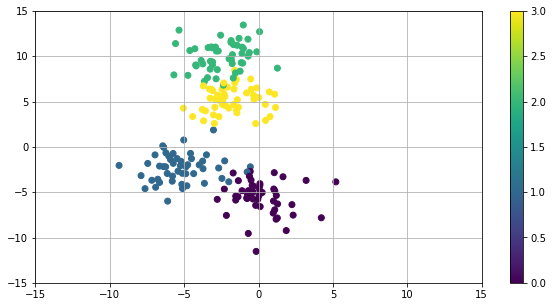

In [2]:
# create np array for data points
points = data[0]
labels = data[1]


# create scatter plot with clases
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
plt.colorbar()
plt.xlim(-15,15)
plt.ylim(-15,15)

Como vamos a simular un sistema no supervisado (sin etiquetas), esto es lo que tiene que entrenar realmente nuestro Modelo

(-15.0, 15.0)

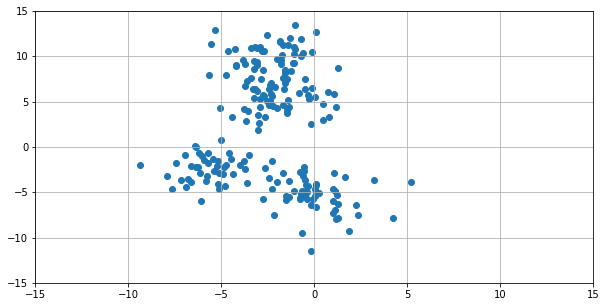

In [3]:
# create scatter plot without clases
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(points[:,0], points[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)

__2. Aplicamos __KMeans__ (sobre los datos, sin etiquetas), para que el Modelo ML genere 4 clusters__

In [4]:
# import KMeans
from sklearn.cluster import KMeans

In [5]:
# create kmeans object
kmeans = KMeans(n_clusters=4, random_state=33)

# fit kmeans object to data
kmeans.fit(points)

KMeans(n_clusters=4, random_state=33)

In [6]:
# print location of clusters learned by kmeans object and represent them
trained_centers = kmeans.cluster_centers_
print(trained_centers)

[[-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]]


(-15.0, 15.0)

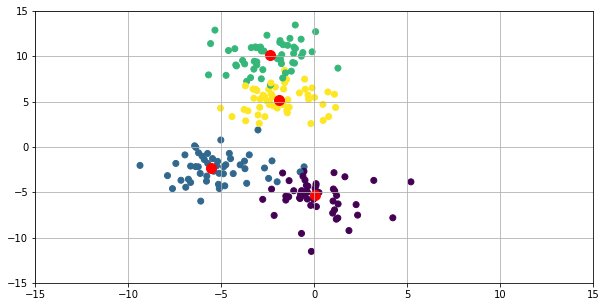

In [7]:
# create scatter plot
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
plt.scatter(trained_centers[:,0], trained_centers[:, 1], color = 'red', s=100)
plt.xlim(-15,15)
plt.ylim(-15,15)

(-15.0, 15.0)

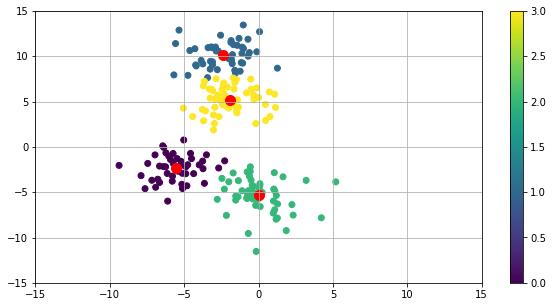

In [8]:
# save new clusters for chart
predicted_labels = kmeans.predict(points)

# create scatter plot
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='viridis')
plt.colorbar()

plt.scatter(trained_centers[:,0], trained_centers[:, 1], color = 'red', s=100)
plt.xlim(-15,15)
plt.ylim(-15,15)

In [9]:
print(f"Original:\n{labels}")
print(f"Predicted:\n{predicted_labels}")

Original:
[2 0 3 3 1 0 2 0 0 1 1 2 1 1 1 3 2 2 1 1 1 3 2 2 2 3 2 1 3 2 2 1 1 0 0 1 1
 1 3 3 2 1 3 3 0 0 2 3 3 2 0 1 3 2 3 3 0 1 1 3 0 0 2 0 0 2 0 3 2 2 0 1 2 0
 3 3 1 3 3 0 1 3 1 1 1 1 2 0 2 1 0 2 0 3 3 1 0 3 0 3 1 0 3 2 3 0 3 1 1 2 0
 1 2 2 1 3 2 2 3 0 2 2 2 2 0 2 2 3 2 0 1 0 0 3 2 3 0 2 2 1 2 3 2 1 1 2 0 3
 0 1 2 1 3 0 0 3 2 0 0 0 3 3 1 0 1 1 1 3 0 0 0 0 1 3 0 2 1 0 2 3 0 3 3 2 1
 0 1 2 3 0 3 3 1 3 0 2 1 3 1 2]
Predicted:
[1 2 3 1 0 2 1 2 2 0 0 1 0 3 0 3 1 1 0 0 0 3 1 1 1 3 1 2 3 1 1 0 0 2 2 0 0
 0 3 3 1 0 3 3 2 2 1 3 3 1 2 0 3 1 3 3 2 0 0 3 2 2 1 2 2 1 2 3 1 1 2 0 1 2
 3 3 0 3 3 2 0 3 0 0 0 0 1 2 1 0 2 1 2 3 3 0 2 3 2 3 0 2 3 1 3 2 3 2 0 1 2
 0 1 1 0 3 1 1 3 2 1 3 1 1 2 1 1 3 3 2 0 2 2 3 1 3 2 1 1 0 1 3 3 2 0 1 2 3
 2 0 1 0 3 2 2 3 1 2 2 2 3 3 2 2 0 0 0 3 2 2 2 2 0 3 2 3 0 2 1 3 2 3 3 1 0
 2 0 1 3 2 3 3 0 3 2 1 0 3 0 1]


In [10]:
#Let's convert to compare results
#Original   Predicted
#   0           2
#   1           0
#   2           1
#   3           3
predicted_labels2 = predicted_labels.copy()
predicted_labels2[predicted_labels == 0] = 2
predicted_labels2[predicted_labels == 1] = 0
predicted_labels2[predicted_labels == 2] = 3
predicted_labels2[predicted_labels == 3] = 1

In [11]:
#Lets calculate our error rate
error_positions = np.abs(labels - predicted_labels2) > 0
error_rate = np.sum(error_positions)/len(labels)
print(f"error rate = {error_rate *100}%")

error rate = 99.5%


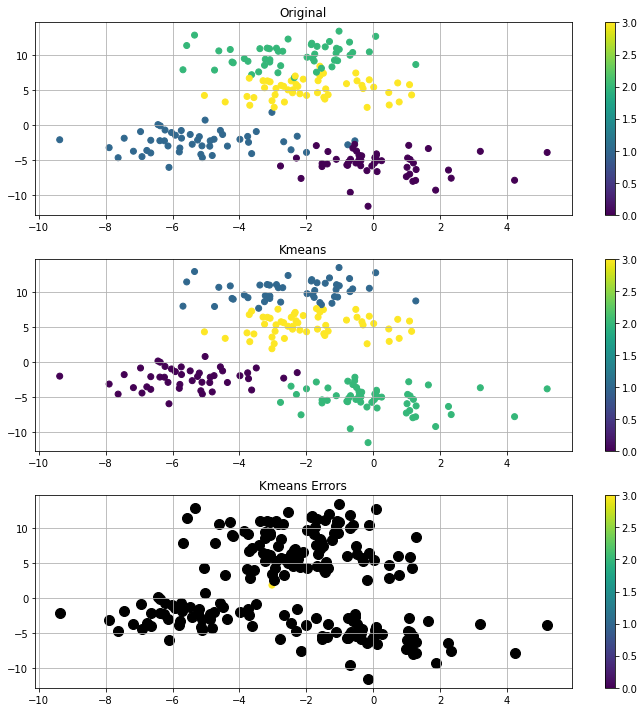

In [12]:
#lets paint which points where not clustered well
# create scatter plot
plt.figure(figsize=(10,10))


plt.subplot(311)
plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
plt.colorbar()
plt.title("Original")
plt.grid()


plt.subplot(312)
plt.grid()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='viridis')
plt.title("Kmeans")
plt.colorbar()

plt.subplot(313)
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='viridis')
plt.colorbar()
plt.scatter(points[error_positions,0], points[error_positions, 1], color = 'black', s=100)
plt.title("Kmeans Errors")

plt.grid()

plt.tight_layout()

<p><span style="font-size: 18pt;">Agglomerative Hierarchical Clustering DBSCAN</span></p>
<p><span style="font-size: 12pt;">In the first iteration every point is considered a cluster. Then at each iteration the two closest points are joined in a same cluster. This way we create a dendrogram and at the end we have a big giant cluster</span><span style="color: rgba(0 , 0 , 0 , 0.84); font-family: , 'georgia' , 'cambria' , 'times new roman' , 'times' , serif; font-size: 21px; letter-spacing: -0.004em;">. <strong><span style="font-size: 12pt;">Maximizes the simple-linkage clusters distance</span></strong></span></p>
<figure class="lp lq lr ls lt ez x y paragraph-image" style="box-sizing: inherit; margin-top: 56px; margin-right: auto; margin-left: auto; clear: both; color: rgba(0 , 0 , 0 , 0.8); font-family: , , 'blinkmacsystemfont' , 'segoe ui' , 'roboto' , 'oxygen' , 'ubuntu' , 'cantarell' , 'open sans' , 'helvetica neue' , sans-serif; font-size: medium;">
<div class="mm l en mn" style="box-sizing: inherit; position: relative; margin: auto; background-color: rgba(0 , 0 , 0 , 0.05);">
<div class="nd l" style="box-sizing: inherit; padding-bottom: 200.362px;"><img class="pa pb gm n o gl ab gj" style="box-sizing: inherit; top: 0px; left: 0px; width: 667px; background: #ffffff; height: 303px; position: absolute; opacity: 1; transition: opacity 400ms ease 0ms;" src="https://miro.medium.com/max/961/1*p3Z5TOp0egX3ItAXw0JZlQ.jpeg" alt="" width="200" height="472" /></div>
<p>&nbsp;</p>
</div>
</figure>
<p>&nbsp;</p>
<p>&nbsp;</p>

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hc_predicted_labels = hc.fit_predict(points)

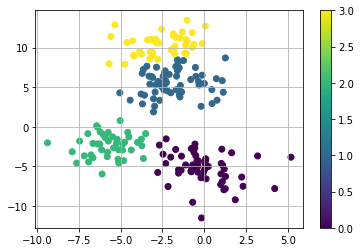

In [14]:
plt.grid()
plt.scatter(points[:,0], points[:,1], c=hc_predicted_labels, cmap='viridis')
plt.colorbar()

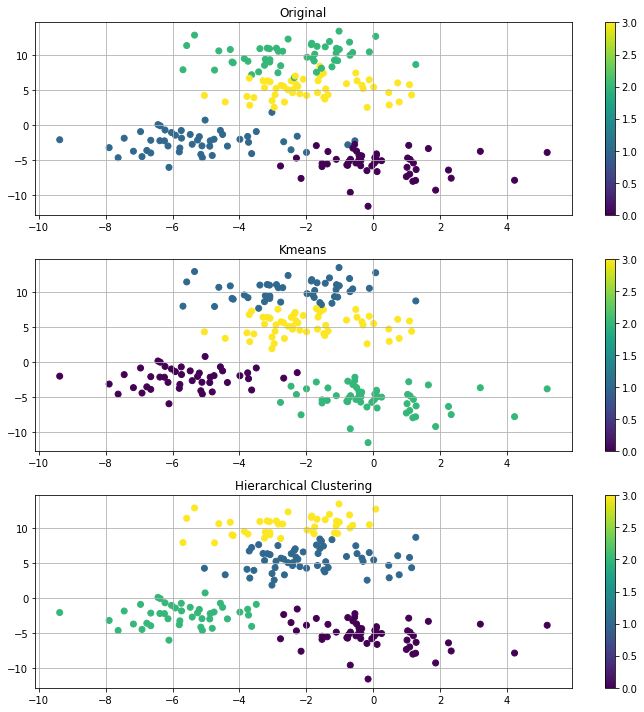

In [15]:
plt.figure(figsize=(10,10))


plt.subplot(311)
plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
plt.colorbar()
plt.title("Original")
plt.grid()


plt.subplot(312)
plt.grid()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='viridis')
plt.title("Kmeans")
plt.colorbar()

plt.subplot(313)
plt.scatter(points[:,0], points[:, 1], c=hc_predicted_labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.grid()
plt.colorbar()

plt.tight_layout()

In [16]:
#Let's convert to compare results
#Original   Predicted
#   0           0
#   1           2
#   2           3
#   3           1
hc_predicted_labels2 = hc_predicted_labels.copy()
hc_predicted_labels2[hc_predicted_labels == 0] = 0
hc_predicted_labels2[hc_predicted_labels == 1] = 3
hc_predicted_labels2[hc_predicted_labels == 2] = 1
hc_predicted_labels2[hc_predicted_labels == 3] = 2

#Lets calculate our error rate
hc_error_positions = np.abs(labels - hc_predicted_labels2) > 0
hc_error_rate = np.sum(hc_error_positions)/len(labels)
print(f"HC error rate = {hc_error_rate *100}%")

HC error rate = 7.5%


#### Ejercicio 3: Customer Segmentation. Aplicamos a datos reales según los datos de mis clientes y su comportamiento

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./Data/Mall_Customers.csv", header = 0, names =["ID", "Gender", "Age", "Income_KDollars", "Company_Score" ])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               200 non-null    int64 
 1   Gender           200 non-null    object
 2   Age              200 non-null    int64 
 3   Income_KDollars  200 non-null    int64 
 4   Company_Score    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
display(df.head())

,ID,Gender,Age,Income_KDollars,Company_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


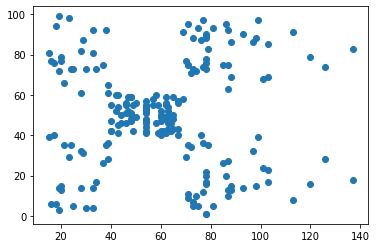

In [19]:
customers_data = df.drop(["ID", "Gender","Age"], axis=1, inplace=False)
customers =  customers_data.to_numpy()
plt.scatter(customers[:,0], customers[:,1])

In [20]:
customers.shape

(200, 2)

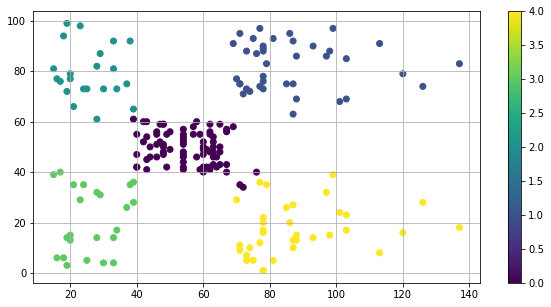

In [21]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=5, random_state=33)

# fit kmeans object to data
kmeans_cluster_labels = kmeans.fit_predict(customers)

# plot the results
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(customers[:,0], customers[:,1], c=kmeans_cluster_labels, cmap='viridis')
plt.colorbar()

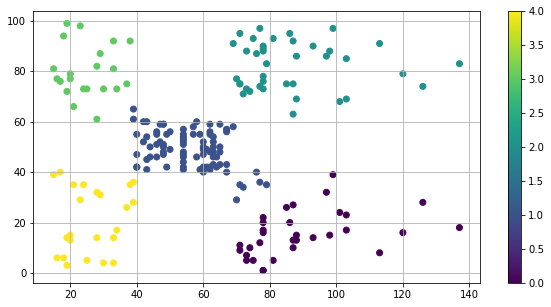

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hc_customers_labels = hc.fit_predict(customers)

# plot the results
plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(customers[:,0], customers[:,1], c=hc_customers_labels, cmap='viridis')
plt.colorbar()